In [0]:
# konlpy 인스톨 하기 #konlpy= 한국어 정보처리를 위한 파이썬 패키지.
pip install konlpy

     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 2.9MB 54.8MB/s 
     |████████████████████████████████| 92kB 14.0MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [0]:
pip install glove_python

     |████████████████████████████████| 266kB 4.9MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=700263 sha256=8da52f8ac95f9e0a6b5a5f48837ab162ed7c83bd75e6808a7c53b13af8f99ce9
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


In [0]:
import konlpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

형태소 분석(POS-tagging)이란 원시말뭉치를 형태소 단위로 쪼개고 각 형태소에 품사 정보를 부착하는 작업을 가리킵니다. 
특히 KoNLPy는 시중에 공개된 꼬꼬마, 코모란, 트위터, 한나눔, 은전한닢 다섯개 형태소 분석기를 한꺼번에 묶어서 편리하게 사용할 수 있도록 한 패키지입니다.

꼬꼬마는 세종품사태그에 가장 가깝고 분석 범주 또한 가장 많습니다. 
트위터는 꼬꼬마 대비 분석 범주가 다소 적은 편이지만 이모티콘이나 해쉬태그 같은 인터넷 텍스트에 특화된 범주가 추가된 점이 눈에 띕니다. 
코모란은 분석 범주 개수로는 꼬꼬마와 트위터 중간에 위치하고, 개발자 분께서 지속적으로 업데이트를 해주시고 계신 점이 강점이라고 할 수 있겠습니다.

#데이터 불러오기 ex)여기서는 test 데이터만 사용

In [0]:
#스포츠 뉴스기사를 테스트데이터로 사용한다. 한글이니 euc-kr로 인코딩 해주고 header로 index가 제목이 되는것을 방지
#대용량의 데이터를 불러오는 경우 각 칼럼의 데이터 타입(dtype)을 추측하는 것이 매우 많은 메모리를 사용하기 때문에 대용량의 데이터를 불러올때 메모리 에러가 발생하는 경우 이를 False로 설정할 것을 권장한다.
#제목 + 기사내용
article_data = pd.read_csv('/content/drive/My Drive/3차 프로젝트/news_sports_sample.csv', low_memory=False, encoding='euc-kr', header=None)
article_data1=pd.DataFrame(article_data[1])
article_data2=pd.DataFrame(article_data[6])
article_data_g=pd.DataFrame(article_data1[1]+article_data2[6])
article_data_g.to_csv('/content/drive/My Drive/3차 프로젝트/sports.txt', index=False, header=None, sep="\t")

#konlpy에서 text 파일 읽어오기

In [0]:
data=konlpy.utils.read_txt('/content/drive/My Drive/3차 프로젝트/test.txt', encoding=u'utf-8')

#konlpy 안에 있는 형태소 분석기

Hannanum - KAIST 말뭉치를 이용해 생성된 사전

Kkma - 세종 말뭉치를 이용해 생성된 사전 (꼬꼬마)

Mecab - 세종 말뭉치로 만들어진 CSV형태의 사전

Komoran- Java로 쓰여진 오픈소스 한글 형태소 분석기

Twitter(Okt) - 오픈소스 한글 형태소 분석기

# hannanum 형태소 분석기

In [0]:
from konlpy.tag import Hannanum
hannanum = Hannanum() 
 
hannanum.analyze  #구(Phrase) 분석
hannanum.morphs   #형태소 분석
hannanum.nouns    #명사 분석
hannanum.pos      #형태소 분석 태깅
 
# 사용예시
print(hannanum.analyze(u'롯데마트의 흑마늘 양념 치킨이 논란이 되고 있다.'))
[[[('롯데마트', 'ncn'), ('의', 'jcm')], [('롯데마트의', 'ncn')], [('롯데마트', 'nqq'), ('의', 'jcm')], [('롯데마트의', 'nqq')]], [[('흑마늘', 'ncn')], [('흑마늘', 'nqq')]], [[('양념', 'ncn')]], [[('치킨', 'ncn'), ('이', 'jcc')], [('치킨', 'ncn'), ('이', 'jcs')], [('치킨', 'ncn'), ('이', 'ncn')]], [[('논란', 'ncpa'), ('이', 'jcc')], [('논란', 'ncpa'), ('이', 'jcs')], [('논란', 'ncpa'), ('이', 'ncn')]], [[('되', 'nbu'), ('고', 'jcj')], [('되', 'nbu'), ('이', 'jp'), ('고', 'ecc')], [('되', 'nbu'), ('이', 'jp'), ('고', 'ecs')], [('되', 'nbu'), ('이', 'jp'), ('고', 'ecx')], [('되', 'paa'), ('고', 'ecc')], [('되', 'paa'), ('고', 'ecs')], [('되', 'paa'), ('고', 'ecx')], [('되', 'pvg'), ('고', 'ecc')], [('되', 'pvg'), ('고', 'ecs')], [('되', 'pvg'), ('고', 'ecx')], [('되', 'px'), ('고', 'ecc')], [('되', 'px'), ('고', 'ecs')], [('되', 'px'), ('고', 'ecx')]], [[('있', 'paa'), ('다', 'ef')], [('있', 'px'), ('다', 'ef')]], [[('.', 'sf')], [('.', 'sy')]]]
 
print(hannanum.morphs(u'롯데마트의 흑마늘 양념 치킨이 논란이 되고 있다.'))
['롯데마트', '의', '흑마늘', '양념', '치킨', '이', '논란', '이', '되', '고', '있', '다', '.']
 
print(hannanum.nouns(u'(로마=연합뉴스) 전성훈 특파원 = 신종 코로나바이러스 감염증(코로나19) 확산과 관련한 봉쇄 조처의 점진적 해제를 준비하는 이탈리아가 마스크 가격 폭등을 막기 위해 가격 상한제를 도입한다.'))
['(로마=연합뉴스)', '전성훈', '특파원', '신종', '코로나바이러스', '감염증(코로나19)', '확산', '관련한', '봉쇄', '조처', '점진적', '해제', '준비', '이탈리아', '마스크', '가격', '폭등', '가격', '상한제', '도입']
 
print(hannanum.pos(u'(로마=연합뉴스) 전성훈 특파원 = 신종 코로나바이러스 감염증(코로나19) 확산과 관련한 봉쇄 조처의 점진적 해제'))
[('웃', 'P'), ('으면', 'E'), ('더', 'M'), ('행복', 'N'), ('하', 'X'), ('ㅂ니다', 'E'), ('!', 'S')]

[[[('롯데마트', 'ncn'), ('의', 'jcm')], [('롯데마트의', 'ncn')], [('롯데마트', 'nqq'), ('의', 'jcm')], [('롯데마트의', 'nqq')]], [[('흑마늘', 'ncn')], [('흑마늘', 'nqq')]], [[('양념', 'ncn')]], [[('치킨', 'ncn'), ('이', 'jcc')], [('치킨', 'ncn'), ('이', 'jcs')], [('치킨', 'ncn'), ('이', 'ncn')]], [[('논란', 'ncpa'), ('이', 'jcc')], [('논란', 'ncpa'), ('이', 'jcs')], [('논란', 'ncpa'), ('이', 'ncn')]], [[('되', 'nbu'), ('고', 'jcj')], [('되', 'nbu'), ('이', 'jp'), ('고', 'ecc')], [('되', 'nbu'), ('이', 'jp'), ('고', 'ecs')], [('되', 'nbu'), ('이', 'jp'), ('고', 'ecx')], [('되', 'paa'), ('고', 'ecc')], [('되', 'paa'), ('고', 'ecs')], [('되', 'paa'), ('고', 'ecx')], [('되', 'pvg'), ('고', 'ecc')], [('되', 'pvg'), ('고', 'ecs')], [('되', 'pvg'), ('고', 'ecx')], [('되', 'px'), ('고', 'ecc')], [('되', 'px'), ('고', 'ecs')], [('되', 'px'), ('고', 'ecx')]], [[('있', 'paa'), ('다', 'ef')], [('있', 'px'), ('다', 'ef')]], [[('.', 'sf')], [('.', 'sy')]]]
['롯데마트', '의', '흑마늘', '양념', '치킨', '이', '논란', '이', '되', '고', '있', '다', '.']
['(로마=연합뉴스)', '전성훈', '특파원', '신종', '코로나바이러스', '감염

[('웃', 'P'),
 ('으면', 'E'),
 ('더', 'M'),
 ('행복', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('!', 'S')]

In [0]:
print(hannanum.pos(u'(로마=연합뉴스) 전성훈 특파원 = 신종 코로나바이러스 감염증(코로나19) 확산과 관련한 봉쇄 조처의 점진적 해제'))
[('(로마=연합뉴스)', 'N'), ('전성훈', 'N'), ('특파원', 'N'), ('=', 'S'), ('신종', 'N'), ('코로나바이러스', 'N'), ('감염증(코로나19)', 'N'),
 ('확산', 'N'), ('과', 'J'), ('관련한', 'N'), ('봉쇄', 'N'), ('조처', 'N'), ('의', 'J'), ('점진적', 'N'), ('해제', 'N')]

In [0]:
print(kkma.pos(u'(로마=연합뉴스) 전성훈 특파원 = 신종 코로나바이러스 감염증(코로나19) 확산과 관련한 봉쇄 조처의 점진적 해제'))
('(', 'SS'), ('로마', 'NNG'), ('=', 'SW'), ('연합', 'NNG'), ('뉴스', 'NNG'), (')', 'SS'), ('전성', 'NNG'), ('훈', 'NNG'), ('특파원', 'NNG'), ('=', 'SW'), ('신종', 'NNG'), ('코로나', 'NNG'), ('바', 'NNG'), ('이러스', 'UN'), ('감염증', 'NNG'), ('(', 'SS'), ('코로나', 'NNG'), ('19', 'NR'), (')', 'SS'), ('확산', 'NNG'),
 ('과', 'JKM'), ('관련', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('봉쇄', 'NNG'), ('조처', 'NNG'), ('의', 'JKG'), ('점진적', 'NNG'), ('해제', 'NNG')

In [0]:
print(komoran.pos(u'(로마=연합뉴스) 전성훈 특파원 = 신종 코로나바이러스 감염증(코로나19) 확산과 관련한 봉쇄 조처의 점진적 해제'))
('(', 'SS'), ('로마', 'NNP'), ('=', 'SW'), ('연합뉴스', 'NNP'), (')', 'SS'), ('전', 'MM'), ('성훈', 'NNP'), ('특파원', 'NNP'), ('=', 'SW'), 
('신종', 'NNP'), ('코로나바이러스', 'NNP'), ('감염증', 'NNG'), ('(', 'SS'), ('코로나', 'NNP'), ('19', 'NNP'), (')', 'SS'), ('확산', 'NNG'), 
('과', 'JC'), ('관련', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('봉쇄', 'NNP'), ('조처', 'NNG'), ('의', 'JKG'), ('점진', 'NNG'), ('적', 'XSN'),('해제', 'NNP')

[('(', 'SS'), ('로마', 'NNP'), ('=', 'SW'), ('연합뉴스', 'NNP'), (')', 'SS'), ('전', 'MM'), ('성훈', 'NNP'), ('특파원', 'NNP'), ('=', 'SW'), ('신종', 'NNP'), ('코로나바이러스', 'NNP'), ('감염증', 'NNG'), ('(', 'SS'), ('코로나', 'NNP'), ('19', 'NNP'), (')', 'SS'), ('확산', 'NNG'), ('과', 'JC'), ('관련', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('봉쇄', 'NNP'), ('조처', 'NNG'), ('의', 'JKG'), ('점진', 'NNG'), ('적', 'XSN'), ('해제', 'NNP')]


In [0]:
print(okt.pos(u'(로마=연합뉴스) 전성훈 특파원 = 신종 코로나바이러스 감염증(코로나19) 확산과 관련한 봉쇄 조처의 점진적 해제'))
('(', 'Punctuation'), ('로마', 'Noun'), ('=', 'Punctuation'), ('연합뉴스', 'Noun'), (')', 'Punctuation'), ('전성훈', 'Noun'), ('특파원', 'Noun'), ('=', 'Punctuation'), ('신종', 'Noun'),
 ('코로나바이러스', 'Noun'), ('감염증', 'Noun'), ('(', 'Punctuation'), ('코로나', 'Noun'), ('19', 'Number'), (')', 'Punctuation'), ('확산', 'Noun'), ('과', 'Josa'), ('관련', 'Noun'), 
 ('한', 'Josa'), ('봉쇄', 'Noun'), ('조처', 'Noun'), ('의', 'Josa'), ('점진', 'Noun'), ('적', 'Suffix'), ('해제', 'Noun')

[('(', 'Punctuation'), ('로마', 'Noun'), ('=', 'Punctuation'), ('연합뉴스', 'Noun'), (')', 'Punctuation'), ('전성훈', 'Noun'), ('특파원', 'Noun'), ('=', 'Punctuation'), ('신종', 'Noun'), ('코로나바이러스', 'Noun'), ('감염증', 'Noun'), ('(', 'Punctuation'), ('코로나', 'Noun'), ('19', 'Number'), (')', 'Punctuation'), ('확산', 'Noun'), ('과', 'Josa'), ('관련', 'Noun'), ('한', 'Josa'), ('봉쇄', 'Noun'), ('조처', 'Noun'), ('의', 'Josa'), ('점진', 'Noun'), ('적', 'Suffix'), ('해제', 'Noun')]


In [0]:
from konlpy.tag import Hannanum
hannanum = Hannanum() 
hannanum.analyze  #구(Phrase) 분석
hannanum.morphs   #형태소 분석
hannanum.nouns    #명사 분석
hannanum.pos      #형태소 분석 태깅
 
# 사용예시
print(hannanum.analyze(data))

print(hannanum.morphs(data))

print(hannanum.nouns(data))
 
print(hannanum.pos(data))

[[[('[', 'sl'), ('앵커', 'ncr'), (']', 'sr'), ('뭔가', 'ncn')]], [[('다른', 'mma')], [('다르', 'paa'), ('ㄴ', 'etm')]], [[('것', 'nbn'), ('이', 'jcs')]], [[('없', 'paa'), ('을까', 'ecs')], [('없', 'paa'), ('을까', 'ef')]], [[('스포츠', 'ncn'), ('에선', 'jca')], [('스포츠', 'ncn'), ('에', 'jca'), ('선', 'jxc')]], [[('새해', 'ncn'), ('를', 'jco')]], [[('맞이', 'ncpa'), ('하', 'xsva'), ('는', 'etm')], [('맞이', 'ncpa'), ('하', 'xsva'), ('어', 'ecs'), ('는', 'jxc')], [('맞이', 'ncpa'), ('하', 'xsva'), ('어', 'ef'), ('는', 'etm')]], [[('방법', 'ncn'), ('을', 'jco')]], [[('놓', 'pvg'), ('고', 'ecc')], [('놓', 'pvg'), ('고', 'ecs')], [('놓', 'pvg'), ('고', 'ecx')], [('놓', 'px'), ('고', 'ecc')], [('놓', 'px'), ('고', 'ecs')], [('놓', 'px'), ('고', 'ecx')]], [[('머리', 'ncn'), ('를', 'jco')]], [[('짜', 'pvg'), ('아', 'ecx'), ('내', 'px'), ('ㅂ니다', 'ef')], [('짜내', 'pvg'), ('ㅂ니다', 'ef')]], [[('.', 'sf')], [('.', 'sy')]], [], [[('우리', 'npp')]], [[('농구', 'ncn'), ('는', 'jxc')]], [[('팬', 'ncn'), ('들', 'xsncc'), ('과', 'jcj')], [('팬', 'ncn'), ('들', 'xsncc'), ('과', '

# kkma 형태소 분석기

In [0]:
from konlpy.tag import Kkma
kkma = Kkma()
 
kkma.morphs         #형태소 분석
kkma.nouns          #명사 분석
kkma.pos            #형태소 분석 태깅
kkma.sentences      #문장 분석
 
# 사용예시
print(kkma.morphs(u'공부를 하면할수록 모르는게 많다는 것을 알게 됩니다.'))
['공부', '를', '하', '면', '하', 'ㄹ수록', '모르', '는', '것', '이', '많', '다는', '것', '을', '알', '게', '되', 'ㅂ니다', '.']
 
print(kkma.nouns(u'(로마=연합뉴스) 전성훈 특파원 = 신종 코로나바이러스 감염증(코로나19) 확산과 관련한 봉쇄 조처의 점진적 해제를 준비하는 이탈리아가 마스크 가격 폭등을 막기 위해 가격 상한제를 도입한다.'))
['로마', '연합', '연합뉴스', '뉴스', '전성', '전성훈', '훈', '특파원', '신종', '코로나', '코로나바이러스', '바', '이러스', '감염증', '코로나19', '19', '확산', '관련', '봉쇄', '조처', '점진적', '해제', '준비', '이탈리아', '마스크', '가격', '폭등', '상한제', '도입']
 
print(kkma.pos(u'다 까먹어버렸네요?ㅋㅋ'))
[('다', 'MAG'), ('까먹', 'VV'), ('어', 'ECD'), ('버리', 'VXV'), ('었', 'EPT'), ('네요', 'EFN'), ('?', 'SF'), ('ㅋㅋ', 'EMO')]
 
print(kkma.sentences(u'그래도 계속 공부합니다. 재밌으니까!'))
['그래도 계속 공부합니다.', '재밌으니까!']


['공부', '를', '하', '면', '하', 'ㄹ수록', '모르', '는', '것', '이', '많', '다는', '것', '을', '알', '게', '되', 'ㅂ니다', '.']
['로마', '연합', '연합뉴스', '뉴스', '전성', '전성훈', '훈', '특파원', '신종', '코로나', '코로나바이러스', '바', '이러스', '감염증', '코로나19', '19', '확산', '관련', '봉쇄', '조처', '점진적', '해제', '준비', '이탈리아', '마스크', '가격', '폭등', '상한제', '도입']
[('다', 'MAG'), ('까먹', 'VV'), ('어', 'ECD'), ('버리', 'VXV'), ('었', 'EPT'), ('네요', 'EFN'), ('?', 'SF'), ('ㅋㅋ', 'EMO')]
['그래도 계속 공부합니다.', '재밌으니까!']


['그래도 계속 공부합니다.', '재밌으니까!']

In [0]:
from konlpy.tag import Kkma
kkma = Kkma()
 
kkma.morphs         #형태소 분석
kkma.nouns          #명사 분석
kkma.pos            #형태소 분석 태깅
kkma.sentences      #문장 분석
 
# 사용예시
print(kkma.morphs(data))
 
print(kkma.nouns(data))
 
print(kkma.pos(data))
 
print(kkma.sentences(data))


['[', '앵커', ']', '뭔', '가', '아', '다르', 'ㄴ', '것', '이', '없', '을까', '스포츠', '에서', '는', '새해', '를', '맞이하', '는', '방법', '을', '놓', '고', '머리', '를', '짜내', 'ㅂ니다', '.', '우리', '농구', '는', '팬', '들', '과', '함께', '새해', '카운트', '다운', '을', '하', '기', '위하', '어서', '자정', '무렵', '까지', '경기', '를', '하', '었', '고', '북미', '아이스하키', ',', 'NHL', '은', '널찍', '하', 'ㄴ', '야외', '미식', '축구장', '으로', '경기장', '을', '옮기', '었', '습니다', '.', '온누리', '기자', '이', 'ㅂ니다', '.', '[', '기자', ']', '하나', '씩', '줄어들', '더', 'ㄴ', '숫자', '가', '0', '으로', '바뀌', '면서', '새해', '는', '커다랗', 'ㄴ', '함성', '과', '함께', '찾아오', '았', '습니다', '.', '서울', '보신각', '도', '아니', 'ㄴ데', '커다랗', 'ㄴ', '종소리', '가', '2020', '년', '을', '알리', '는', '곳', ',', '1', '박', '2', '일', '경기', '가', '펼쳐지', 'ㄴ', '코트', '위', '이', 'ㅂ니다', '.', '12', '월', '의', '마지막', '밤', '시작하', '어', ',', '코트', '에서', '다', '같이', '신년', '을', '맞', '는', '다', '하', '어서', '송구', '영신', '에', '빗', '대', "'", '농구', '영신', "'", '이', '라', '부르', 'ㅂ니다', '.', '올해', '로', '4', '년', '째', '이', 'ㄴ데', ',', '매년', '매진', '기록', '이', '이어지', 'ㅂ니다', '.', '북미', '

#kmoran 분석기

In [0]:
from konlpy.tag import Komoran
komoran = Komoran(userdic='/tmp/dic.txt')
 
komoran.morphs    #형태소 분석
komoran.nouns     #명사 분석
komoran.pos       #형태소 분석 태깅
 
# 사용예시
print(komoran.morphs(u'우왕 코모란도 오픈소스가 되었어요'))
['우왕', '코모란', '도', '오픈소스', '가', '되', '었', '어요']
 
print(komoran.nouns(u'(로마=연합뉴스) 전성훈 특파원 = 신종 코로나바이러스 감염증(코로나19) 확산과 관련한 봉쇄 조처의 점진적 해제를 준비하는 이탈리아가 마스크 가격 폭등을 막기 위해 가격 상한제를 도입한다.'))
['로마', '연합뉴스', '성훈', '특파원', '신종', '코로나바이러스', '감염증', '코로나', '19', '확산', '관련', '봉쇄', '조처', '점진', '해제', '준비', '이탈리아', '마스크', '가격', '폭등', '가격 상한', '도입']
 
print(komoran.pos(u'혹시 바람과 함께 사라지다 봤어?'))
[('혹시', 'MAG'), ('바람과 함께 사라지다', 'NNP'), ('보', 'VV'), ('았', 'EP'), ('어', 'EF'), ('?', 'SF')]

['우왕', '코', '모란', '도', '오픈', '소스', '가', '되', '었', '어요']
['로마', '연합뉴스', '성훈', '특파원', '신종', '코로나바이러스', '감염증', '코로나', '19', '확산', '관련', '봉쇄', '조처', '점진', '해제', '준비', '이탈리아', '마스크', '가격', '폭등', '가격 상한', '도입']
[('혹시', 'MAG'), ('바람과 함께 사라지다', 'NNP'), ('보', 'VV'), ('았', 'EP'), ('어', 'EF'), ('?', 'SF')]


[('혹시', 'MAG'),
 ('바람과 함께 사라지다', 'NNP'),
 ('보', 'VV'),
 ('았', 'EP'),
 ('어', 'EF'),
 ('?', 'SF')]

In [0]:
from konlpy.tag import Komoran
komoran = Komoran(userdic='/tmp/dic.txt')
 
komoran.morphs    #형태소 분석
komoran.nouns     #명사 분석
komoran.pos       #형태소 분석 태깅
 
# 사용예시
print(komoran.morphs(data))
 
print(komoran.nouns(data))
 
print(komoran.pos(data))

['[', '앵커', ']', '뭐', 'ㄴ가', '다른', '게', '없', '을까', '스포츠', '에선', '새해', '를', '맞이', '하', '는', '방법', '을', '놓', '고', '머리', '를', '짜내', 'ㅂ니다', '.', '우리', '농구', '는', '팬', '들', '과', '함께', '새해', '카운트', '다운', '을', '하', '기', '위하', '아서', '자정', '무렵', '까지', '경기', '를', '하', '았', '고', '북미', '아이스하키', ',', 'NHL', '은', '널찍', '하', 'ㄴ', '야외', '미식', '축구장', '으로', '경기장', '을', '옮기', '었', '습니다', '.', '온', '누리', '기자', '이', 'ㅂ니다', '.', '[', '기자', ']', '하나', '씩', '줄어들', '던', '숫자', '가', '0', '으로', '바뀌', '면서', '새해', '는', '커다랗', 'ㄴ', '함성', '과', '함께', '찾아오', '았', '습니다', '.', '서울', '보신각', '도', '아니', 'ㄴ데', '커다랗', 'ㄴ', '종소리', '가', '2020', '년', '을', '알리', '는', '곳', ',', '1박 2일', '경기', '가', '펼쳐지', 'ㄴ', '코트', '위', '이', 'ㅂ니다', '.', '12월', '의', '마지막', '밤', '시작', '하', '아', ',', '코트', '에서', '다', '같이', '신년', '을', '맞', '는다', '하', '아서', '송구영신', '에', '빗대', '어', "'", '농구', '영', '신', "'", '이', '라', '부르', 'ㅂ니다', '.', '올해', '로', '4', '년', '째', '이', 'ㄴ데', ',', '매년', '매진', '기록', '이', '이어지', 'ㅂ니다', '.', '북미', '아이스하키', ',', 'NHL', '의', '새해맞이

#Okt 분석기

In [0]:
from konlpy.tag import Okt
okt = Okt()
 
okt.morphs     #형태소 분석
okt.nouns      #명사 분석
okt.phrases    #구(Phrase) 분석
okt.pos        #형태소 분석 태깅
 
# 사용예시
print(okt.morphs(u'단독입찰보다 복수입찰의 경우'))
['단독', '입찰', '보다', '복수', '입찰', '의', '경우']
 
print(okt.nouns(u'(로마=연합뉴스) 전성훈 특파원 = 신종 코로나바이러스 감염증(코로나19) 확산과 관련한 봉쇄 조처의 점진적 해제를 준비하는 이탈리아가 마스크 가격 폭등을 막기 위해 가격 상한제를 도입한다.'))
['로마', '연합뉴스', '전성훈', '특파원', '신종', '코로나바이러스', '감염증', '코로나', '확산', '관련', '봉쇄', '조처', '점진', '해제', '준비', '이탈리아', '마스크', '가격', '폭등', '위해', '가격', '상한', '제', '도입']
 
print(okt.phrases(u'날카로운 분석과 신뢰감 있는 진행으로'))
['날카로운 분석', '날카로운 분석과 신뢰감', '날카로운 분석과 신뢰감 있는 진행', '분석', '신뢰', '진행']
 
print(okt.pos(u'이것도 되나욬ㅋㅋ'))
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나욬', 'Noun'), ('ㅋㅋ', 'KoreanParticle')]

['단독', '입찰', '보다', '복수', '입찰', '의', '경우']
['로마', '연합뉴스', '전성훈', '특파원', '신종', '코로나바이러스', '감염증', '코로나', '확산', '관련', '봉쇄', '조처', '점진', '해제', '준비', '이탈리아', '마스크', '가격', '폭등', '위해', '가격', '상한', '제', '도입']
['날카로운 분석', '날카로운 분석과 신뢰감', '날카로운 분석과 신뢰감 있는 진행', '분석', '신뢰', '진행']
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나욬', 'Noun'), ('ㅋㅋ', 'KoreanParticle')]


[('이', 'Determiner'),
 ('것', 'Noun'),
 ('도', 'Josa'),
 ('되나욬', 'Noun'),
 ('ㅋㅋ', 'KoreanParticle')]

In [0]:
from konlpy.tag import Okt
okt = Okt()
 
okt.morphs     #형태소 분석
okt.nouns      #명사 분석
okt.phrases    #구(Phrase) 분석
okt.pos        #형태소 분석 태깅
 
# 사용예시
print(okt.morphs(data))
 
print(okt.nouns(data))
 
print(okt.phrases(data))
 
print(okt.pos(data))

['[', '앵커', ']', '뭔가', '다른', '게', '없을까', '스포츠', '에선', '새해', '를', '맞이', '하는', '방법', '을', '놓고', '머리', '를', '짜냅니다', '.', '우리', '농구', '는', '팬', '들', '과', '함께', '새해', '카운트', '다운', '을', '하기', '위해', '서', '자정', '무렵', '까지', '경기', '를', '했고', '북미', '아이스하키', ',', 'NHL', '은', '널찍한', '야외', '미식', '축구장', '으로', '경기장', '을', '옮겼습니다', '.', '온누리', '기자', '입니다', '.[', '기자', ']', '하나', '씩', '줄어들던', '숫자', '가', '\n ', '0', '으로', '바뀌면서', '새해', '는', '커다란', '함성', '과', '함께', '찾아왔습니다', '.', '서울', '보신각', '도', '아닌데', '커다란', '종소리', '가', '2020년', '을', '알리는', '곳', ',', '1', '박', '2일', '경기', '가', '펼쳐진', '코트', '위', '입니다', '.', '12월', '의', '마지막', '밤', '시작', '해', ',', '코트', '에서', '다', '같이', '신년', '을', '맞는다', '해서', '송구영신', '에', '빗대', "'", '농구', '영', '신', "'", '이라', '부릅니다', '.', '\n', '올해', '로', '4년', '째인데', ',', '매년', '매진', '기록', '이', '이어집니다', '.', '북미', '아이스하키', ',', 'NHL', '의', '새해', '맞이', '는', '또', '다릅니다', '.', '영하', '13', '도의', '강', '추위', '그러나', '10만', '명', '넘는', '팬', '들', '의', '\n ', '뜨거운', '열기', '에', '선수', '들', '얼굴', '에

#word2vec란? = 단어의 의미를 벡터화 할 수 있는 방법

#함수중 okt 를 사용한것은 많은 데이터를 학습시켜야하는데 시간이 없기때문!!!
전체 5만건의 기사를 크롤링해서 분석했기 때문에 시간이 오래걸림!!!

#word2vec 학습시키기
1. 불용어와 정규표현식을 통한 한글 외 문자 제거 안했을때

In [0]:
train_data = pd.read_table('/content/drive/My Drive/3차 프로젝트/sports.txt',index_col=None, header=None)
# NULL 값 존재 유무
print(train_data.isnull().values.any())
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) 
train_data[:5]

True
False


,0
0,'농구영신'·야외 아이스하키..팬들과 함께한 새해맞이[앵커]뭔가 다른 게 없을까 스...
1,GERMANY SKI JUMPING FOUR HILLS TOURNAMENTepa08...
2,"마이샤 하인즈 알렌,'버저비터 슛' [사진]3쿼터 부천 KEB하나은행 마이샤가 공격..."
3,스미스 '정확한 슛' [MK포토]매경닷컴 MK스포츠(부천체육관)=김재현 기자2일 오...
4,"'신승' 이상민 감독 ""경기력은 연패 때보다 안 좋았다""[엑스포츠뉴스 잠실실내, 조..."


In [0]:
# 정규 표현식을 통한 한글 외 문자 제거
#train_data[0] = train_data[0].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
#불용어 제거
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [0]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data[0]:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

In [0]:
print('기사의 최대 길이 :',max(len(l) for l in tokenized_data))
print('기사의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [0]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [0]:
#similar 함수는 입력된 단어와 비슷한 코사인 유사도를 가지는 단어를 찾아서 나열해준다.
model.wv.vectors.shape
print(model.wv.most_similar("손흥민"))

[('을', 0.9968864917755127), ('에서', 0.9968428611755371), (',', 0.9968417882919312), ('.', 0.9967831969261169), ('(', 0.9967650175094604), ('오다', 0.9964478015899658), ('선수', 0.9964211583137512), ('1', 0.9962705373764038), (')', 0.996115505695343), ('경기', 0.9960095882415771)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


#word2vec 학습시키기 2
1. 불용어와 정규표현식으로 제거

In [0]:
train_data = pd.read_table('/content/drive/My Drive/3차 프로젝트/sports.txt',index_col=None, header=None)
# NULL 값 존재 유무
print(train_data.isnull().values.any())
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) 
train_data[:5]

In [0]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data[0] = train_data[0].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
#불용어 제거
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [0]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data[0]:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

In [0]:
print('기사의 최대 길이 :',max(len(l) for l in tokenized_data))
print('기사의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [0]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [0]:
#similar 함수는 입력된 단어와 비슷한 코사인 유사도를 가지는 단어를 찾아서 나열해준다.
model.wv.vectors.shape
print(model.wv.most_similar("손흥민"))

#word2vec 해보기 3
1. 불용어, 정규표현식, 명사일때만 저장

In [0]:
from konlpy.tag import Okt  
okt=Okt()
fread = open('/content/drive/My Drive/3차 프로젝트/news_sports_total.txt', encoding="utf8")
# 파일을 다시 처음부터 읽음.
n=0
result = []

while True:
    line = fread.readline() #한 줄씩 읽음.
    if not line: break # 모두 읽으면 while문 종료.
    n=n+1
    if n%5000==0: # 5,000의 배수로 While문이 실행될 때마다 몇 번째 While문 실행인지 출력.
        print("%d번째 While문."%n)
    tokenlist = okt.pos(line, stem=True, norm=True) # 단어 토큰화
    temp=[]
    for word in tokenlist:
        if word[1] in ["Noun"]: # 명사일 때만
            temp.append((word[0])) # 해당 단어를 저장함

    if temp: # 만약 이번에 읽은 데이터에 명사가 존재할 경우에만
      result.append(temp) # 결과에 저장
fread.close()

5000번째 While문.
10000번째 While문.


기사의 최대 길이 : 905
기사의 평균 길이 : 72.41420698101653


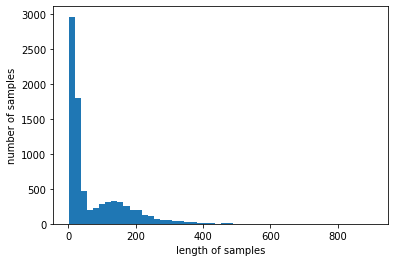

In [0]:
# 기사 길이 분포 확인
print('기사의 최대 길이 :',max(len(l) for l in result))
print('기사의 평균 길이 :',sum(map(len, result))/len(result))
plt.hist([len(s) for s in result], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [0]:
#총 샘플의 개수
print(len(result))

8165


In [0]:
from gensim.models import Word2Vec
model = Word2Vec(result, size=100, window=5, min_count=5, workers=4, sg=1)

In [0]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(8969, 100)

In [0]:
model_result1 = model.wv.most_similar("손흥민")
print(model_result1)

[('케인', 0.8328101634979248), ('토트넘', 0.8136297464370728), ('해리', 0.7371008396148682), ('황의조', 0.7291497588157654), ('레르마', 0.7280834913253784), ('본머스', 0.705183744430542), ('투호', 0.6944847702980042), ('홋스퍼', 0.6766153573989868), ('레드카드', 0.6763831377029419), ('피어', 0.676268994808197)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


#글로브 사용하기

#글로브 함수를 사용했지만 word2vec보다 적중율이 낮음!! 사용하는건 word2vec 모델로 결정

In [0]:
from glove import Corpus, Glove

corpus = Corpus() 
corpus.fit(result, window=5)
# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성

glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.

In [0]:
model_result1=glove.most_similar("손흥민")
print(model_result1)

In [0]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
!python -m gensim.scripts.word2vec2tensor --input eng_w2v --output eng_w2v

2020-05-06 07:17:40,542 - word2vec2tensor - INFO - running /usr/local/lib/python3.6/dist-packages/gensim/scripts/word2vec2tensor.py --input eng_w2v --output eng_w2v
2020-05-06 07:17:40,542 - utils_any2vec - INFO - loading projection weights from eng_w2v
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-05-06 07:17:41,308 - utils_any2vec - INFO - loaded (8969, 100) matrix from eng_w2v
2020-05-06 07:17:41,958 - word2vec2tensor - INFO - 2D tensor file saved to eng_w2v_tensor.tsv
2020-05-06 07:17:41,958 - word2vec2tensor - INFO - Tensor metadata file saved to eng_w2v_metadata.tsv
2020-05-06 07:17:41,959 - word2vec2tensor - INFO - finished running word2vec2tensor.py


#정치

In [0]:
news_politics_total = pd.read_csv('/content/drive/My Drive/3차 프로젝트/news_politics_total.csv', low_memory=False, header=None)
news_politics_total1=pd.DataFrame(news_politics_total[1])
news_politics_total1.to_csv('/content/drive/My Drive/3차 프로젝트/news_politics_total.txt', index=False, header=None, sep="\t")

In [0]:
from konlpy.tag import Okt  
okt=Okt()
fread = open('/content/drive/My Drive/3차 프로젝트/news_politics_total.txt', encoding="utf8")
# 파일을 다시 처음부터 읽음.
n=0
result = []

while True:
    line = fread.readline() #한 줄씩 읽음.
    if not line: break # 모두 읽으면 while문 종료.
    n=n+1
    if n%5000==0: # 5,000의 배수로 While문이 실행될 때마다 몇 번째 While문 실행인지 출력.
        print("%d번째 While문."%n)
    tokenlist = okt.pos(line, stem=True, norm=True) # 단어 토큰화
    temp=[]
    for word in tokenlist:
        if word[1] in ["Noun"]: # 명사일 때만
            temp.append((word[0])) # 해당 단어를 저장함

    if temp: # 만약 이번에 읽은 데이터에 명사가 존재할 경우에만
      result.append(temp) # 결과에 저장
fread.close()

5000번째 While문.
10000번째 While문.
15000번째 While문.
20000번째 While문.
25000번째 While문.
30000번째 While문.
35000번째 While문.
40000번째 While문.
45000번째 While문.
50000번째 While문.
55000번째 While문.
60000번째 While문.
65000번째 While문.
70000번째 While문.
75000번째 While문.
80000번째 While문.


In [0]:
#총 샘플의 개수
print(len(result))

69666


In [0]:
from gensim.models import Word2Vec
model = Word2Vec(result, size=100, window=5, min_count=5, workers=4, sg=1)

In [0]:
model_result1 = model.wv.most_similar("문재인")
model_result1

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('문', 0.7541869878768921),
 ('대통령', 0.7148005962371826),
 ('강문규', 0.6103129386901855),
 ('나렌드', 0.6041297912597656),
 ('임형섭', 0.6002660989761353),
 ('안호균', 0.6001085042953491),
 ('박경준', 0.5927916765213013),
 ('박진희', 0.5824447274208069),
 ('리센룽', 0.5788382291793823),
 ('황광모', 0.5695754885673523)]

#스포츠

In [0]:
from konlpy.tag import Okt  
okt=Okt()
fread = open('/content/drive/My Drive/3차 프로젝트/news_sports_total.txt', encoding="utf8")
# 파일을 다시 처음부터 읽음.
n=0
result = []

while True:
    line = fread.readline() #한 줄씩 읽음.
    if not line: break # 모두 읽으면 while문 종료.
    n=n+1
    if n%5000==0: # 5,000의 배수로 While문이 실행될 때마다 몇 번째 While문 실행인지 출력.
        print("%d번째 While문."%n)
    tokenlist = okt.pos(line, stem=True, norm=True) # 단어 토큰화
    temp=[]
    for word in tokenlist:
        if word[1] in ["Noun"]: # 명사일 때만
            temp.append((word[0])) # 해당 단어를 저장함

    if temp: # 만약 이번에 읽은 데이터에 명사가 존재할 경우에만
      result.append(temp) # 결과에 저장
fread.close()

In [0]:
from gensim.models import Word2Vec
model1 = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [0]:
model1.wv.vectors.shape

In [0]:
print(model1.wv.most_similar("손흥민"))

#사회

In [0]:
news_society_total = pd.read_csv('/content/drive/My Drive/3차 프로젝트/news_society_total.csv', low_memory=False, header=None)
news_society_total1=pd.DataFrame(news_society_total[1])
news_society_total1.to_csv('/content/drive/My Drive/3차 프로젝트/news_society_total.txt', index=False, header=None, sep="\t")

In [0]:
from konlpy.tag import Okt  
okt=Okt()
fread = open('/content/drive/My Drive/3차 프로젝트/news_society_total.txt', encoding="utf8")
# 파일을 다시 처음부터 읽음.
n=0
result = []

while True:
    line = fread.readline() #한 줄씩 읽음.
    if not line: break # 모두 읽으면 while문 종료.
    n=n+1
    if n%5000==0: # 5,000의 배수로 While문이 실행될 때마다 몇 번째 While문 실행인지 출력.
        print("%d번째 While문."%n)
    tokenlist = okt.pos(line, stem=True, norm=True) # 단어 토큰화
    temp=[]
    for word in tokenlist:
        if word[1] in ["Noun"]: # 명사일 때만
            temp.append((word[0])) # 해당 단어를 저장함

    if temp: # 만약 이번에 읽은 데이터에 명사가 존재할 경우에만
      result.append(temp) # 결과에 저장
fread.close()

5000번째 While문.
10000번째 While문.


In [0]:
from gensim.models import Word2Vec
model2 = Word2Vec(result, size=100, window=5, min_count=5, workers=4, sg=1)

In [0]:
model2.wv.vectors.shape

(14051, 100)

In [0]:
print(model.wv.most_similar("대통령"))

[('대선', 0.7387567162513733), ('박근혜', 0.7224291563034058), ('문재인', 0.7205234169960022), ('트럼프', 0.7148177623748779), ('이명박', 0.698952317237854), ('친서', 0.6956204771995544), ('도널드', 0.6928045153617859), ('노무현', 0.6866187453269958), ('박정희', 0.6760705709457397), ('국무위원', 0.6728364825248718)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


#문화

In [0]:
news_culture_total = pd.read_csv('/content/drive/My Drive/3차 프로젝트/news_culture_total.csv', low_memory=False, header=None)
news_culture_total1=pd.DataFrame(news_culture_total[1])
news_culture_total1.to_csv('/content/drive/My Drive/3차 프로젝트/news_culture_total.txt', index=False, header=None, sep="\t")

In [0]:
from konlpy.tag import Okt  
okt=Okt()
fread = open('/content/drive/My Drive/3차 프로젝트/news_culture_total.txt', encoding="utf8")
# 파일을 다시 처음부터 읽음.
n=0
result = []

while True:
    line = fread.readline() #한 줄씩 읽음.
    if not line: break # 모두 읽으면 while문 종료.
    n=n+1
    if n%5000==0: # 5,000의 배수로 While문이 실행될 때마다 몇 번째 While문 실행인지 출력.
        print("%d번째 While문."%n)
    tokenlist = okt.pos(line, stem=True, norm=True) # 단어 토큰화
    temp=[]
    for word in tokenlist:
        if word[1] in ["Noun"]: # 명사일 때만
            temp.append((word[0])) # 해당 단어를 저장함

    if temp: # 만약 이번에 읽은 데이터에 명사가 존재할 경우에만
      result.append(temp) # 결과에 저장
fread.close()

5000번째 While문.
10000번째 While문.


In [0]:
from gensim.models import Word2Vec
model3 = Word2Vec(result, size=100, window=5, min_count=5, workers=4, sg=1)

In [0]:
print(model3.wv.most_similar("레드벨벳"))

#IT

In [0]:
news_digital_total = pd.read_csv('/content/drive/My Drive/3차 프로젝트/news_digital_total.csv', low_memory=False, header=None)
news_digital_total1=pd.DataFrame(news_digital_total[1])
news_digital_total1.to_csv('/content/drive/My Drive/3차 프로젝트/news_digital_total.txt', index=False, header=None, sep="\t")

In [0]:
train_data4 = pd.read_table('/content/drive/My Drive/3차 프로젝트/news_digital_total.txt', header=None)

In [0]:
from konlpy.tag import Okt  
okt=Okt()
fread = open('/content/drive/My Drive/3차 프로젝트/news_digital_total.txt', encoding="utf8")
# 파일을 다시 처음부터 읽음.
n=0
result = []

while True:
    line = fread.readline() #한 줄씩 읽음.
    if not line: break # 모두 읽으면 while문 종료.
    n=n+1
    if n%5000==0: # 5,000의 배수로 While문이 실행될 때마다 몇 번째 While문 실행인지 출력.
        print("%d번째 While문."%n)
    tokenlist = okt.pos(line, stem=True, norm=True) # 단어 토큰화
    temp=[]
    for word in tokenlist:
        if word[1] in ["Noun"]: # 명사일 때만
            temp.append((word[0])) # 해당 단어를 저장함

    if temp: # 만약 이번에 읽은 데이터에 명사가 존재할 경우에만
      result.append(temp) # 결과에 저장
fread.close()

5000번째 While문.


In [0]:
#총 샘플의 개수
print(len(result))

7484


In [0]:
from gensim.models import Word2Vec
model = Word2Vec(result, size=100, window=5, min_count=5, workers=4, sg=1)

In [0]:
model_result1 = model.wv.most_similar("머신러닝")
model_result1

NameError: ignored

In [0]:
train_data4 = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data4.isnull().values.any()) # Null 값이 존재하는지 확인

In [0]:
print(train_data4.isnull().values.any())

In [0]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data4[0] = train_data4[0].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [0]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data4[0]:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

In [0]:
from gensim.models import Word2Vec
model4 = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [0]:
model4.wv.vectors.shape

In [0]:
print(model4.wv.most_similar("빅데이터"))

#경제

In [0]:
news_economic_total = pd.read_csv('/content/drive/My Drive/3차 프로젝트/news_economic_total.csv', low_memory=False, header=None)
news_economic_total1=pd.DataFrame(news_digital_total[1])
news_economic_total1.to_csv('/content/drive/My Drive/3차 프로젝트/news_economic_total.txt', index=False, header=None, sep="\t")

In [0]:
train_data5 = pd.read_table('/content/drive/My Drive/3차 프로젝트/news_economic_total.txt', header=None)

In [0]:
train_data5 = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data5.isnull().values.any()) # Null 값이 존재하는지 확인

In [0]:
print(train_data5.isnull().values.any())

In [0]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data5[0] = train_data5[0].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [0]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data5[0]:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

In [0]:
from gensim.models import Word2Vec
model5 = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [0]:
model5.wv.vectors.shape

In [0]:
print(model5.wv.most_similar("빅데이터"))

#에디터

In [0]:
news_editorial_total = pd.read_csv('/content/drive/My Drive/3차 프로젝트/news_editorial_total.csv', low_memory=False, header=None)
news_editorial_total1=pd.DataFrame(news_editorial_total[1])
news_editorial_total1.to_csv('/content/drive/My Drive/3차 프로젝트/news_editorial_total.txt', index=False, header=None, sep="\t")

In [0]:
train_data6 = pd.read_table('/content/drive/My Drive/3차 프로젝트/news_editorial_total.txt', header=None)

In [0]:
train_data6 = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data6.isnull().values.any()) # Null 값이 존재하는지 확인

In [0]:
print(train_data6.isnull().values.any())

In [0]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data6[0] = train_data6[0].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [0]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data6[0]:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

In [0]:
from gensim.models import Word2Vec
model6 = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [0]:
model6.wv.vectors.shape

In [0]:
print(model6.wv.most_similar("에디터"))

#연예

In [0]:
news_entertain_total = pd.read_csv('/content/drive/My Drive/3차 프로젝트/news_entertain_total.csv', low_memory=False, header=None)
news_entertain_total1=pd.DataFrame(news_entertain_total[1])
news_entertain_total1.to_csv('/content/drive/My Drive/3차 프로젝트/news_entertain_total.txt', index=False, header=None, sep="\t")

In [0]:
train_data7 = pd.read_table('/content/drive/My Drive/3차 프로젝트/news_entertain_total.txt', header=None)

In [0]:
train_data7 = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data7.isnull().values.any()) # Null 값이 존재하는지 확인

In [0]:
print(train_data7.isnull().values.any())

In [0]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data7[0] = train_data7[0].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [0]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data7[0]:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

In [0]:
from gensim.models import Word2Vec
model7 = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [0]:
model7.wv.vectors.shape

In [0]:
print(model7.wv.most_similar("트와이스"))

#태그 만들기

In [0]:
data=pd.DataFrame(news[1]+news[2])

KeyError: ignored

In [0]:
import numpy as np

In [0]:
news = pd.read_csv('/content/drive/My Drive/3차 프로젝트/tag/news_economic_choice.csv', low_memory=False, header=None, encoding='utf-8')
news = pd.DataFrame(news[1]+news[2])
news
news.to_csv('/content/drive/My Drive/3차 프로젝트/tag/news_economic_choice.txt', index=False, header=None, sep="\t")

In [0]:
from konlpy.tag import Okt  
okt=Okt()
fread = open('/content/drive/My Drive/3차 프로젝트/tag/news_economic_choice.txt', encoding="utf8")
# 파일을 다시 처음부터 읽음.
n=0
result = []

while True:
    line = fread.readline() #한 줄씩 읽음.
    if not line: break # 모두 읽으면 while문 종료.
    n=n+1
    if n%5000==0: # 5,000의 배수로 While문이 실행될 때마다 몇 번째 While문 실행인지 출력.
        print("%d번째 While문."%n)
    tokenlist = okt.pos(line, stem=True, norm=True) # 단어 토큰화
    temp=[]
    for word in tokenlist:
        if word[1] in ["Noun"]: # 명사일 때만
            temp.append((word[0])) # 해당 단어를 저장함

    if temp: # 만약 이번에 읽은 데이터에 명사가 존재할 경우에만
      result.append(temp) # 결과에 저장
fread.close()

In [0]:
result=np.array(result)
sport1=result[1]


In [0]:
for i in range(1,23,1):
  globals()['sport{}'.format(i)] = result[i]

In [0]:
counts = Counter(sport23)
counts

Counter({'가운데': 1,
         '간': 1,
         '갈등': 1,
         '감식': 2,
         '강제': 8,
         '개발': 1,
         '개월': 1,
         '갱': 4,
         '건': 1,
         '건의': 1,
         '검색': 1,
         '것': 4,
         '게': 1,
         '격전': 1,
         '경우': 1,
         '계획': 3,
         '고': 1,
         '곳': 3,
         '공동': 1,
         '과거': 1,
         '과정': 1,
         '관련': 1,
         '관리': 1,
         '구덩이': 1,
         '구의': 1,
         '국내': 6,
         '군사기지': 1,
         '기업': 1,
         '기자': 1,
         '꼬드겨': 1,
         '나현준': 1,
         '난관': 1,
         '내지': 1,
         '네': 1,
         '노': 1,
         '노동': 1,
         '노역': 1,
         '논의': 1,
         '농장': 1,
         '단체': 1,
         '달': 1,
         '당시': 1,
         '대거': 1,
         '더욱': 1,
         '동원': 2,
         '뒤': 1,
         '등': 1,
         '따라서': 1,
         '또': 1,
         '러시아': 1,
         '료': 1,
         '망고': 1,
         '매장': 1,
         '면제': 1,
         '명': 2,
         '모두': 1,

In [0]:
vocab = sorted(counts, key=counts.get, reverse=True)
vocab

['강제',
 '징용',
 '하이난섬',
 '하이난',
 '유해',
 '국내',
 '정부',
 '일제',
 '것',
 '추정',
 '봉환',
 '갱',
 '송환',
 '추진',
 '중국',
 '여',
 '위',
 '조선인',
 '유골',
 '계획',
 '이후',
 '곳',
 '이',
 '중',
 '천인',
 '작업',
 '한인',
 '피해자',
 '학살',
 '주장',
 '지역',
 '신고',
 '유족',
 '유전자',
 '감식',
 '행안부',
 '명',
 '동원',
 '정도',
 '일본군',
 '사망',
 '진행',
 '중이',
 '현재',
 '희생',
 '현장',
 '배상',
 '문제',
 '한일',
 '갈등',
 '가운데',
 '일제강점기',
 '당시',
 '노',
 '패',
 '구의',
 '따라서',
 '경우',
 '인정',
 '일본',
 '더욱',
 '설득',
 '전망',
 '행정안전부',
 '과거',
 '관련',
 '업무',
 '원단',
 '피해',
 '발굴',
 '통해',
 '여부',
 '확인',
 '후',
 '봉',
 '올해',
 '안',
 '등',
 '논의',
 '실무',
 '협의',
 '학계',
 '간',
 '달',
 '점령',
 '뒤',
 '해당',
 '요새',
 '군사기지',
 '과정',
 '노동',
 '충당',
 '위해',
 '한반도',
 '전역',
 '수감',
 '죄수',
 '개월',
 '참여',
 '잔',
 '형기',
 '모두',
 '면제',
 '고',
 '꼬드겨',
 '조선',
 '전체',
 '수형',
 '사상',
 '범',
 '상당수',
 '포함',
 '게',
 '연구자',
 '절반',
 '노역',
 '생존',
 '해방',
 '전',
 '대거',
 '제기',
 '구덩이',
 '이유',
 '건',
 '행방불명',
 '건의',
 '검색',
 '망고',
 '농장',
 '운영',
 '한국',
 '기업',
 '처음',
 '수습',
 '민간',
 '단체',
 '추모',
 '회',
 '인근',
 '집단',
 '매장',
 '평',
 '관리',

In [0]:
from gensim.models import Word2Vec
model = Word2Vec(result, size=100, window=5, min_count=5, workers=4, sg=1)

In [0]:
print(model.wv.most_similar("니시코리"))

[('점', 0.9110809564590454), ('세트', 0.9083617925643921), ('후반', 0.9005950689315796), ('바텀', 0.9005885720252991), ('공격', 0.8999465703964233), ('이후', 0.8980318307876587), ('로', 0.8977850079536438), ('를', 0.8969867825508118), ('칼텍스', 0.8966139554977417), ('반격', 0.896577775478363)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
from collections import Counter

In [0]:
counts = Counter(result)
counts

TypeError: ignored

In [0]:
vocab = sorted(counts, key=counts.get, reverse=True)
vocab

['니시코리',
 '세트',
 '두바이',
 '위',
 '챔피언십',
 '강',
 '탈락',
 '테니스',
 '남자',
 '난',
 '톱',
 '시드',
 '덜미',
 '매경닷컴',
 '스포츠',
 '이상철',
 '기자',
 '단식',
 '세계',
 '랭킹',
 '게이',
 '일본',
 '프로',
 '투어',
 '현지',
 '시간',
 '아랍에미리트',
 '대회',
 '강전',
 '후베르트',
 '후르',
 '카츠',
 '폴란드',
 '스코어',
 '로',
 '범실',
 '범',
 '고개',
 '화가',
 '듯',
 '라켓',
 '던지기',
 '첫',
 '서브',
 '때',
 '리듬',
 '상대',
 '더',
 '플레이']